# El corpus Fashion-MNIST

Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando, que consta de un conjunto de entrenamiento de 60,000 ejemplos y un conjunto de pruebas de 10,000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28x28, asociada a una etiqueta de 10 clases. Zalando pretende que Fashion-MNIST sirva como un reemplazo directo del conjunto de datos MNIST original para algoritmos de aprendizaje automático de visión por computadora. Contiene imágenes de diversos artículos de ropa, como camisetas, vestidos, pantalones y zapatos, entre otros.

Importado de dependencias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from collections import Counter

Carga de datos

In [3]:
fashion_mnist = fetch_openml(name="Fashion-MNIST")
print(fashion_mnist.DESCR)

c:\MUIARFID\RFA\rfa_projects\.venv\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  
**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  
**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. 

Raw data available at: https://github.com/zalandoresearch/fashion-mnist

### Target classes
Each training and test example is assigned to one of the following labels:
Label  Description  
0  T-shirt/top  
1  Trouser  
2  Pullover  
3  Dress  
4  

Descipción

In [4]:
# Extrae las imágenes y las etiquetas
images, labels = fashion_mnist.data, fashion_mnist.target

# Definición de las clases
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
print("Tamaño de las etiquetas: ", labels.shape)
print("Etiquetas: ", np.unique(labels))
print("Tamaño del conjunto de datos: ", images.shape)
print("Tamaño de las imágenes: ", images.shape[1])

Tamaño de las etiquetas:  (70000,)
Etiquetas:  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Tamaño del conjunto de datos:  (70000, 784)
Tamaño de las imágenes:  784


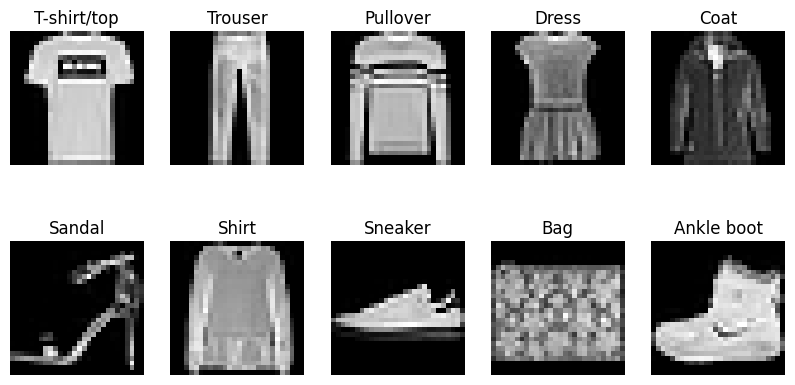

In [9]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
unique_labels = np.unique(labels)
for i, unique_label in enumerate(unique_labels):
    ax = axes[i//5, i%5]
    image_index = np.where(labels == unique_label)[0][0]
    image = np.array(images.iloc[image_index]).reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title(class_names[int(unique_label)])
    ax.axis('off')

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0.0, 0, 'T-shirt/top'),
  Text(1.0, 0, 'Trouser'),
  Text(2.0, 0, 'Pullover'),
  Text(3.0, 0, 'Dress'),
  Text(4.0, 0, 'Coat'),
  Text(5.0, 0, 'Sandal'),
  Text(6.0, 0, 'Shirt'),
  Text(7.0, 0, 'Sneaker'),
  Text(8.0, 0, 'Bag'),
  Text(9.0, 0, 'Ankle boot')])

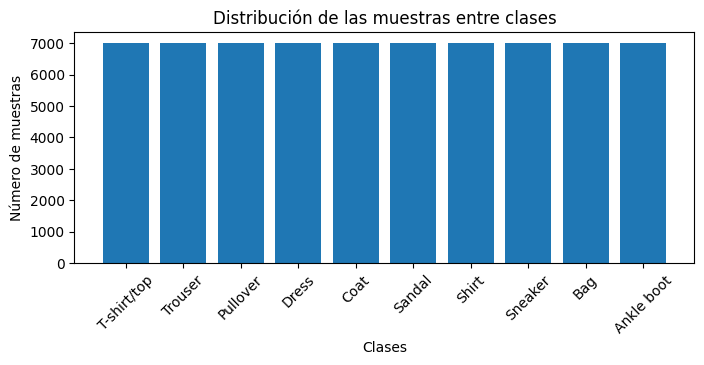

In [11]:
label_count = Counter(labels)
plt.figure(figsize=(8, 3))
plt.bar(label_count.keys(), label_count.values(), tick_label=class_names)
plt.xlabel('Clases')
plt.ylabel('Número de muestras')
plt.title('Distribución de las muestras entre clases')
plt.xticks(rotation=45)

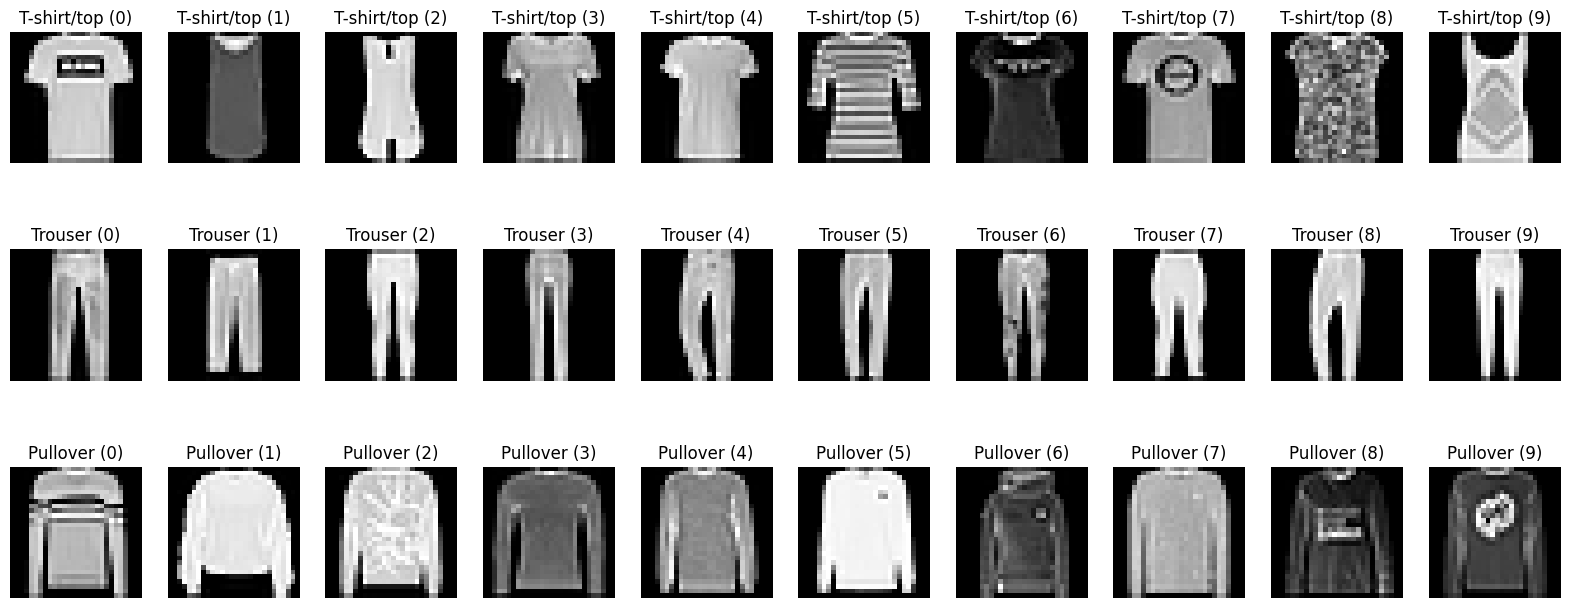

In [16]:
fig, axes = plt.subplots(3, 10, figsize=(20, 8))

for class_idx in range(3):
    class_samples = np.where(labels == str(class_idx))[0][:10]
    for sample_idx, image_index in enumerate(class_samples):
        ax = axes[class_idx, sample_idx]
        image = np.array(images.iloc[image_index]).reshape(28, 28)
        ax.imshow(image, cmap='gray')
        ax.set_title(class_names[int(labels[image_index])] + " (" + str(sample_idx) + ")")
        ax.axis('off')